In [1]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Mosaic Plots using Titanic dataset.  This dataset is often used to predict survival or death using information about the passengers.  

In [59]:
from statsmodels.graphics.mosaicplot import mosaic

In [7]:
Tx = pd.read_csv('Comparing2Treatments.csv')

In [8]:
Tx

,ProductSeries,Coating,CorrRes,SurfRough
0,K135,A,0.30,30
1,K136,A,0.45,86
2,P271,A,0.22,24
3,P275,A,0.40,74
4,S561,A,0.56,70
5,S567,A,0.76,63
6,K135,B,0.22,42
7,K136,B,0.39,31
8,P271,B,0.24,73
9,P275,B,0.44,52


In [49]:
Pie=Tx[Tx["Coating"]=="A"]

([<matplotlib.patches.Wedge at 0x1b88eda3990>,
 [Text(1.0596749891458133, 0.29510831465551873, 'K135'),
  Text(0.27105015339808775, 1.0660824613241104, 'K136'),
  Text(-0.7473204809963129, 0.8071629938763544, 'P271'),
  Text(-1.097791720065066, -0.06966591244349214, 'P275'),
  Text(-0.22252967101267182, -1.0772560259840704, 'S561'),
  Text(0.925868020134711, -0.5939431027395052, 'S567')])

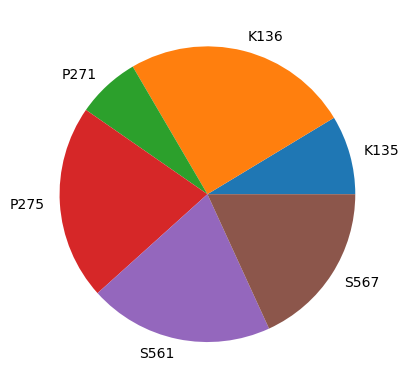

In [47]:
plt.pie(Pie['SurfRough'],labels=Pie['ProductSeries'])

([<matplotlib.patches.Wedge at 0x1b8910f5b50>,
 [Text(1.0196084315031329, 0.4127937092637455, 'K135'),
  Text(0.5441729311077891, 0.955968525135403, 'K136'),
  Text(-0.463611520586837, 0.9975291263813609, 'P271'),
  Text(-1.099953860053509, -0.010075006371501263, 'P275'),
  Text(-0.4267623549682556, -1.0138411573722723, 'S561'),
  Text(0.8815550619964194, -0.6579214791055914, 'S567')])

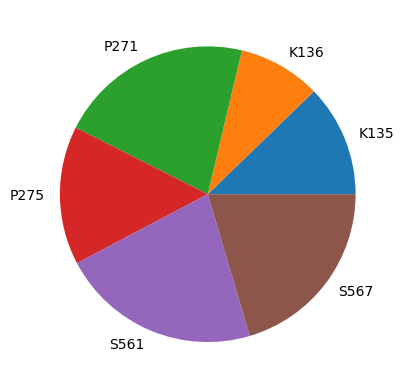

In [52]:
Pie1=Tx[Tx["Coating"]=="B"]
plt.pie(Pie1['SurfRough'],labels=Pie1['ProductSeries'])

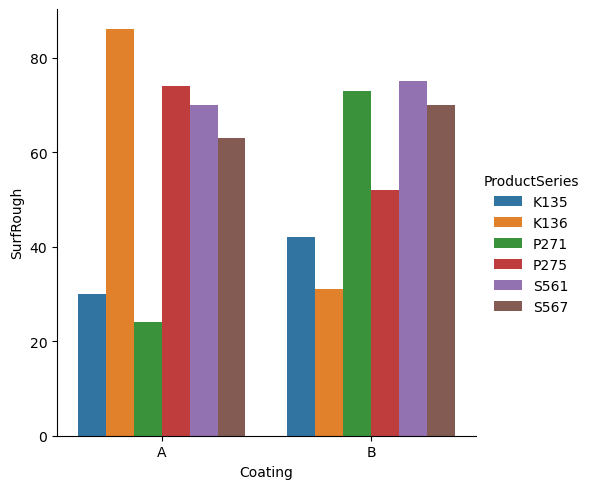

In [56]:
sns.catplot(x=Tx['Coating'],y=Tx['SurfRough'],hue=Tx['ProductSeries'],kind='bar')

<Axes: xlabel='Coating', ylabel='CorrRes'>

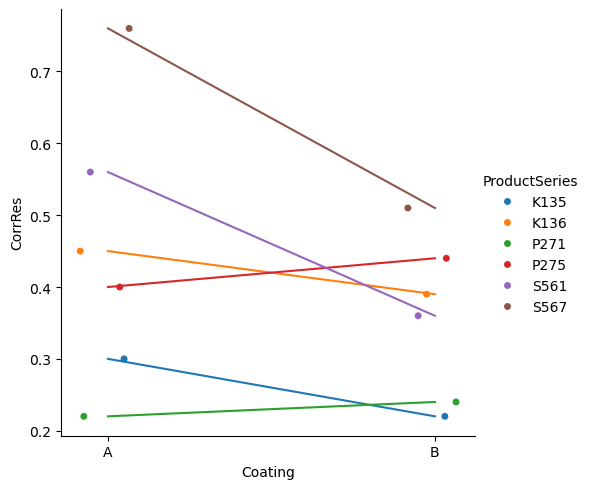

In [57]:
sns.catplot(x=Tx['Coating'],y=Tx['CorrRes'],hue=Tx['ProductSeries'])
sns.lineplot(x=Tx['Coating'],y=Tx['CorrRes'],hue=Tx['ProductSeries'],legend=False)

Name some of our target variables that are categorical as more meaningful names. 

In [626]:
Titanic['Survival']=Titanic.SurvivedWiki.map({0:'Died',1:'Survived'})
Titanic['PassengerClass']=Titanic.Pclass.map({1:'FirstClass',2:'SecondClass',3:'ThirdClass'})

crosstab will provide a table using a pandas dataframe: [pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)  Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [627]:
pd.crosstab(Titanic['Pclass'],Titanic['Sex'],Titanic['SurvivedWiki'],aggfunc=np.sum)

Sex,female,male
Pclass,,
1,139,62
2,94,25
3,106,74


In [628]:
Titanic.head()

,PassengerId,SurvivedKaggleData,SurvivedWiki,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,...,Destination,BodyWiki,NameChecks,LifeBoat,MinutesLifeboatLaunch,TypeofLifeBoat,LifeboatSide,CapacityLifBoat,Survival,PassengerClass
0,1,0.0,0,3,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,...,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,NaN,Died,ThirdClass
1,2,1.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,...,"New York, New York, US",NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,115.0,Lifeboat,Starboard,55.0,Survived,FirstClass
2,3,1.0,1,3,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,...,New York City,NaN,"Heikkinen, Miss. Laina",14,90.0,Lifeboat,Starboard,55.0,Survived,ThirdClass
3,4,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,...,"Scituate, Massachusetts, US",NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",D,125.0,Collapsible,Starboard,37.0,Survived,FirstClass
4,5,0.0,0,3,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,...,New York City,NaN,"Allen, Mr. William Henry",NaN,NaN,NaN,NaN,NaN,Died,ThirdClass


In [629]:
pd.crosstab([Titanic['PassengerClass'],Titanic['Sex']],Titanic['Survival'],margins=True)

Survival               Died  Survived   All
PassengerClass Sex                         
FirstClass     female     5       139   144
               male     118        62   180
SecondClass    female    12        94   106
               male     153        25   178
ThirdClass     female   110       106   216
               male     419        74   493
All                     817       500  1317

In [630]:
# make a table of percentage of all passengers withn group who survived or dies
tableTitanic=pd.crosstab([Titanic['PassengerClass'],Titanic['Sex']],Titanic['Survival'],normalize='all')

In [631]:
tableTitanic

Survival                   Died  Survived
PassengerClass Sex                       
FirstClass     female  0.003797  0.105543
               male    0.089598  0.047077
SecondClass    female  0.009112  0.071374
               male    0.116173  0.018983
ThirdClass     female  0.083523  0.080486
               male    0.318147  0.056188

In [632]:
pd.crosstab(Titanic['PassengerClass'],Titanic['Survival'],normalize='index')

Survival,Died,Survived
PassengerClass,,
FirstClass,0.379630,0.620370
SecondClass,0.580986,0.419014
ThirdClass,0.746121,0.253879


In [633]:
pd.crosstab(Titanic['Sex'],Titanic['Survival'],normalize='index')

Survival,Died,Survived
Sex,,
female,0.272532,0.727468
male,0.810811,0.189189


Create a mosaic plot from the Titanic Data

(<Figure size 1224x360 with 3 Axes>,
 {('Died', 'ThirdClass', 'male'): (0.0,
   0.0,
   0.4878255497460508,
   0.6432028013974562),
  ('Died', 'ThirdClass', 'female'): (0.4891942037678787,
   0.0,
   0.12806876007652884,
   0.6432028013974562),
  ('Died', 'FirstClass', 'male'): (0.0,
   0.6465140596756019,
   0.5908579557647511,
   0.14955377045725354),
  ('Died', 'FirstClass', 'female'): (0.5922266097865792,
   0.6465140596756019,
   0.02503635405782844,
   0.14955377045725354),
  ('Died', 'SecondClass', 'male'): (0.0,
   0.7993790884110012,
   0.5711019963809374,
   0.20062091158899867),
  ('Died', 'SecondClass', 'female'): (0.5724706504027655,
   0.7993790884110012,
   0.04479231344164217,
   0.20062091158899867),
  ('Survived', 'ThirdClass', 'male'): (0.6222380882225169,
   0.0,
   0.15495776868921152,
   0.35761589403973504),
  ('Survived', 'ThirdClass', 'female'): (0.7780334664722106,
   0.0,
   0.22196653352778947,
   0.35761589403973504),
  ('Survived', 'FirstClass', 'male'): (

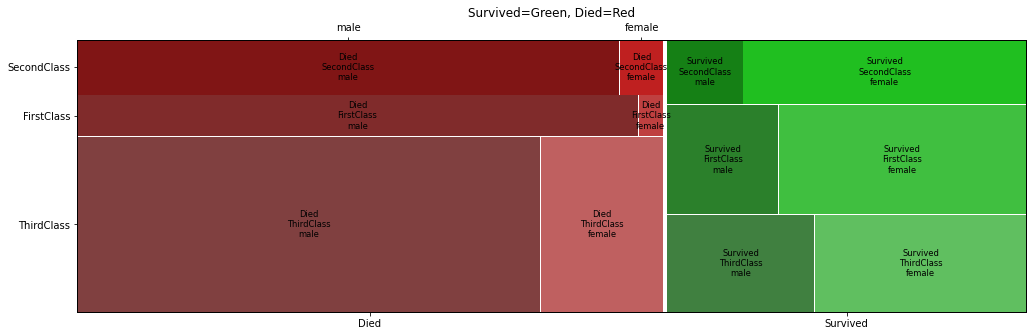

In [634]:
plt.rc('figure',figsize=(17,5))
mosaic(Titanic,['Survival','PassengerClass','Sex'],title='Survived=Green, Died=Red')

# Heatmaps

In [635]:
groupTitanic=Titanic.groupby(['PassengerClass','Survival'])

In [636]:
PassengerClass_Heatmap=groupTitanic.size().unstack()

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass'>

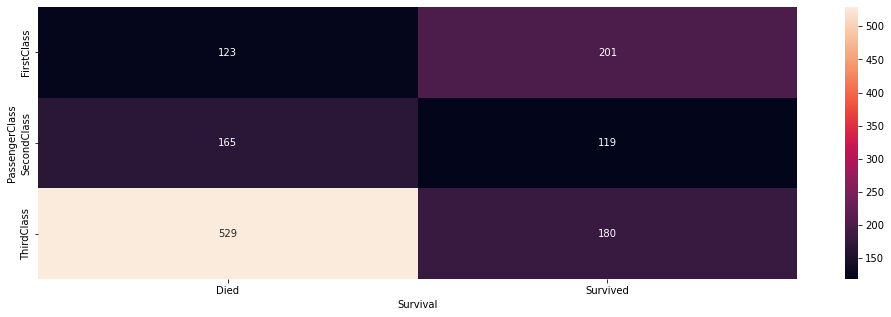

In [637]:
sns.heatmap(PassengerClass_Heatmap,annot=True,fmt="d")

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass'>

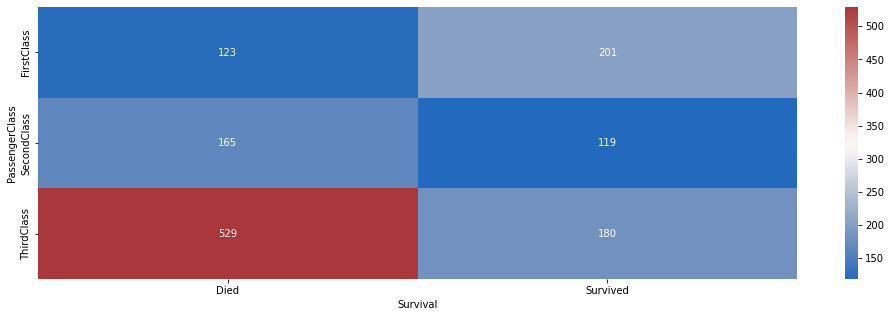

In [638]:
sns.heatmap(PassengerClass_Heatmap,annot=True,fmt="d",cmap='vlag')

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass-Sex'>

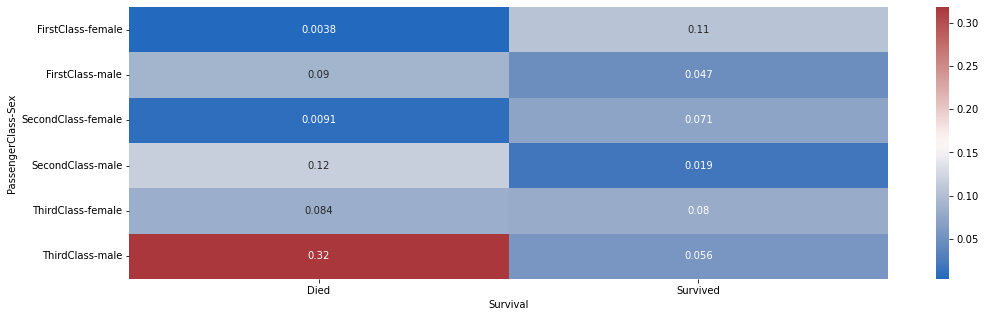

In [639]:
# percentage of those within each group (row) that died or survived, of all passengers
sns.heatmap(tableTitanic,annot=True,cmap='vlag')